## Comcast telecommunication Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\shrab\Desktop\Comcast_telecom_complaints_data.csv')

In [35]:
data.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newstatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,closed


In [5]:
data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
data=data.drop(['Ticket #', 'Time'], axis=1)

In [7]:
data.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


### Task 1: Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
data['Date_month_year']=data['Date_month_year'].apply(pd.to_datetime)

data=data.set_index('Date_month_year')

C:\Users\shrab\AppData\Local\Temp\ipykernel_18548\137094266.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months=data.groupby(pd.Grouper(freq='M')).size().plot()


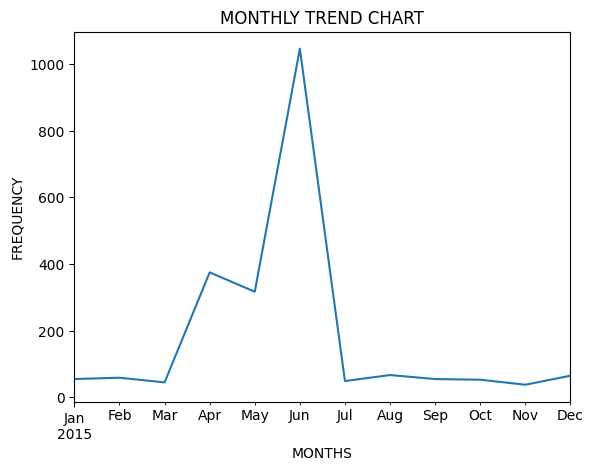

In [9]:
months=data.groupby(pd.Grouper(freq='M')).size().plot()
plt.title('MONTHLY TREND CHART')
plt.xlabel('MONTHS')
plt.ylabel('FREQUENCY')
plt.show()


In [10]:
data['Date'].value_counts(dropna=False)[:8]

Date
24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: count, dtype: int64

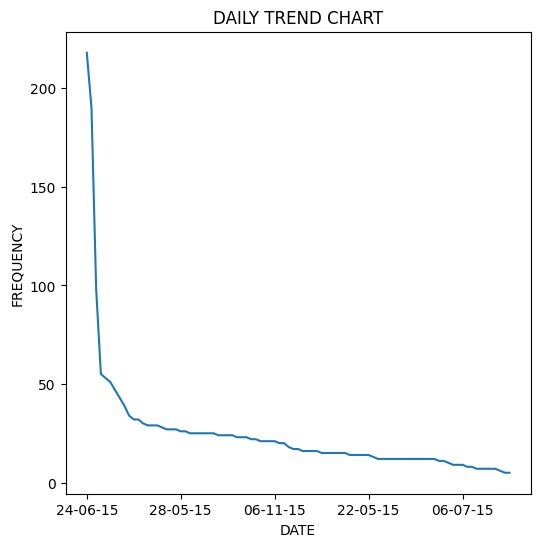

In [11]:
data=data.sort_values(by='Date')
plt.figure(figsize=(6,6))
data['Date'].value_counts().plot()
plt.title('DAILY TREND CHART')
plt.xlabel('DATE')
plt.ylabel('FREQUENCY')
plt.show()

### 2.Provide a table with the frequency of complaint types

In [12]:
data['Customer Complaint'].value_counts(dropna=False)[:9]

Customer Complaint
Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast/Xfinity              8
Name: count, dtype: int64

### 3.Which complaint types are maximum i.e., around internet, network issues, or across any        other domains.

In [13]:
internet_issues1=data[data['Customer Complaint'].str.contains('internet')].count()

In [14]:
internet_issues2=data[data['Customer Complaint'].str.contains('speed')].count()

In [15]:
internet_issues3=data[data['Customer Complaint'].str.contains('data')].count()

In [16]:
internet_issues4=data[data['Customer Complaint'].str.contains('network')].count()

In [17]:
billing_issues1=data[data['Customer Complaint'].str.contains('billing')].count()

In [18]:
billing_issues2=data[data['Customer Complaint'].str.contains('charges')].count()


In [19]:
billing_issues3=data[data['Customer Complaint'].str.contains('bill')].count()

In [20]:
service_issues1=data[data['Customer Complaint'].str.contains('service')].count()

In [21]:
service_issues2=data[data['Customer Complaint'].str.contains('customer')].count()

In [22]:
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4
print('Total Internet Issues:', total_internet_issues)

Total Internet Issues: Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [23]:
total_billing_issues=billing_issues1+billing_issues2+billing_issues3
print('Total Billing Issues:', total_billing_issues)

Total Billing Issues: Customer Complaint             353
Date                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [24]:
total_service_issues=service_issues1+service_issues2
print('Total Service Issues:', total_service_issues)

Total Service Issues: Customer Complaint             360
Date                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64


In [25]:
other_issues=2224-(total_internet_issues+total_billing_issues+total_service_issues)
print('Total Other Issues:', other_issues)

Total Other Issues: Customer Complaint             1137
Date                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64


### 4.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [26]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [27]:
data['newstatus']=['open' if Status=='Open' or Status=='Pending' else 'closed' for Status in data['Status']]
data=data.drop(['Status'], axis=1)
data

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newstatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,open
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,open
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,open


#### 5.Provide state wise status of complaints in a stacked bar chart.

In [28]:
Status_complaints = data.groupby(['State', 'newstatus']).size().unstack()
print(Status_complaints)

newstatus             closed  open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

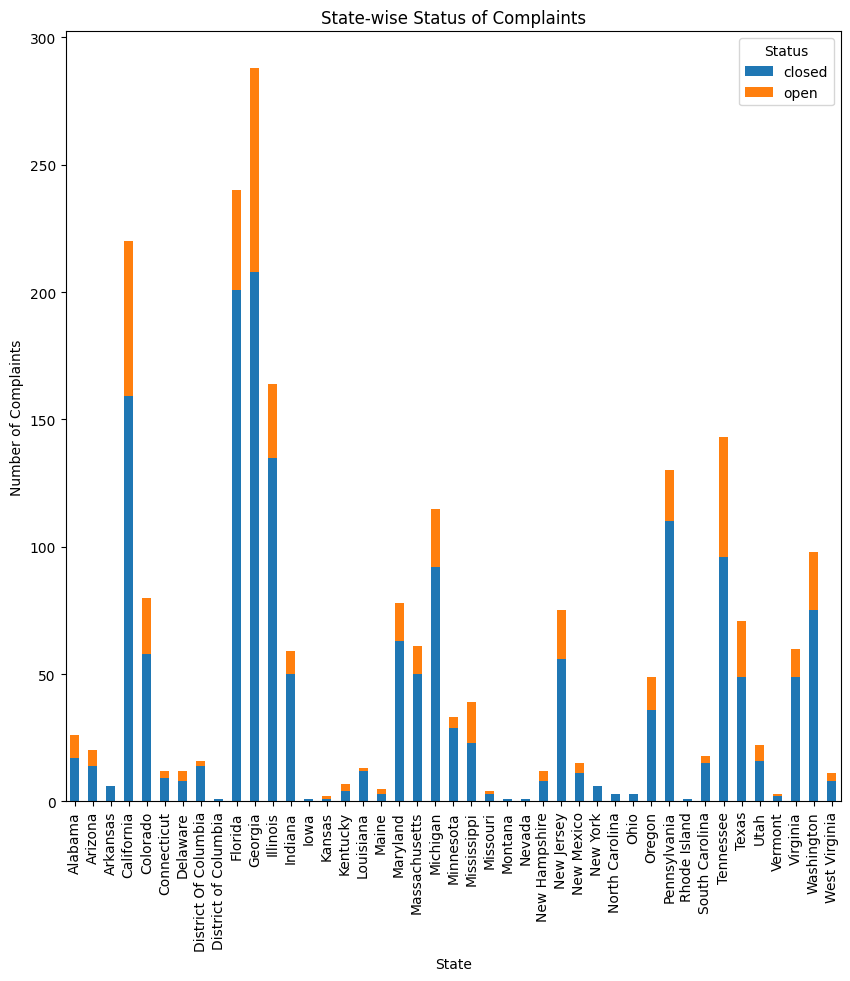

In [29]:
Status_complaints.plot.bar(stacked=True, figsize=(10, 10))
plt.title('State-wise Status of Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.legend(title='Status')
plt.show()

#### 6.Which state has the maximum complaints

In [30]:
data.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

#### 7.Which state has the highest percentage of unresolved complaints

In [31]:
print(data['newstatus'].value_counts())

newstatus
closed    1707
open       517
Name: count, dtype: int64


newstatus             closed  open  unresolved_cmp-prct
State                                                  
Georgia                208.0  80.0            27.777778
California             159.0  61.0            27.727273
Tennessee               96.0  47.0            32.867133
Florida                201.0  39.0            16.250000
Illinois               135.0  29.0            17.682927
Michigan                92.0  23.0            20.000000
Washington              75.0  23.0            23.469388
Colorado                58.0  22.0            27.500000
Texas                   49.0  22.0            30.985915
Pennsylvania           110.0  20.0            15.384615
New Jersey              56.0  19.0            25.333333
Mississippi             23.0  16.0            41.025641
Maryland                63.0  15.0            19.230769
Oregon                  36.0  13.0            26.530612
Massachusetts           50.0  11.0            18.032787
Virginia                49.0  11.0            18

<Axes: xlabel='State'>

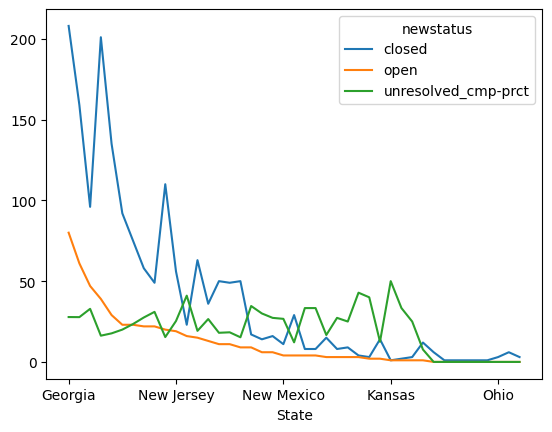

In [32]:
unresolved_data = data.groupby(['State', 'newstatus']).size().unstack().fillna(0).sort_values(by='open', ascending=False)
unresolved_data['unresolved_cmp-prct'] = unresolved_data['open'] / (unresolved_data['open'] + unresolved_data['closed']) * 100
print(unresolved_data)
unresolved_data.plot()

#### 8.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [33]:
resolved_data = data.groupby(['Received Via', 'newstatus']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['closed'] / (resolved_data['open'] + resolved_data['closed']) * 100
resolved_data['resolved']


Received Via
Customer Care Call    77.211796
Internet              76.289593
Name: resolved, dtype: float64

<Axes: xlabel='Received Via'>

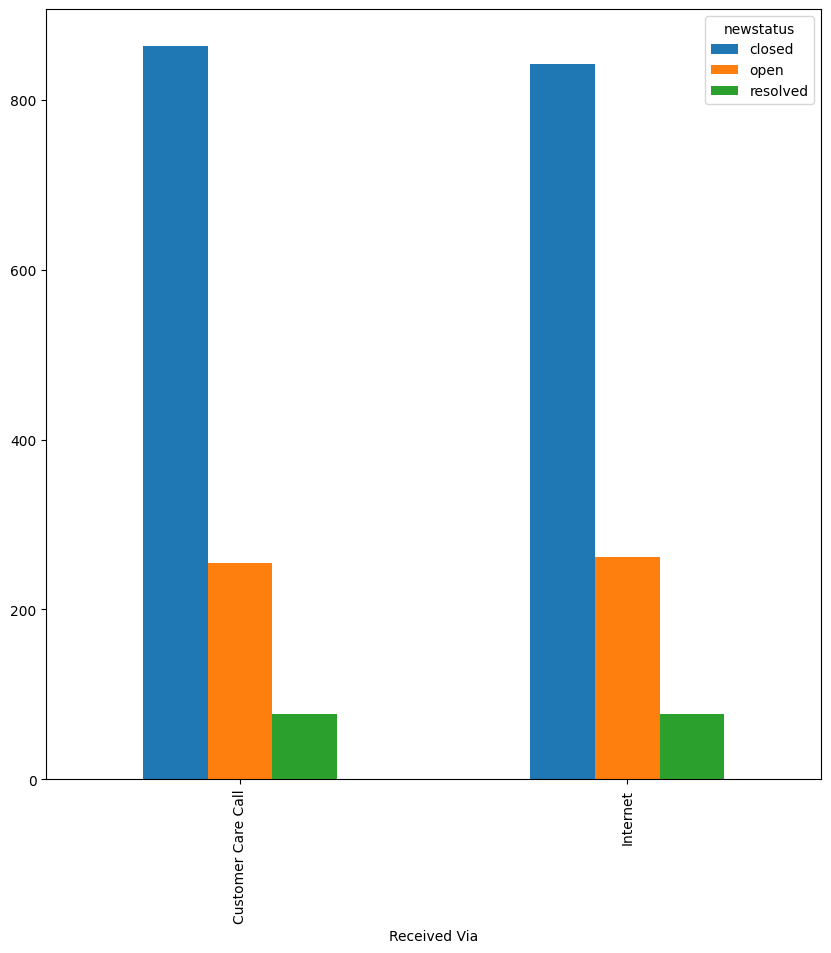

In [34]:
resolved_data.plot.bar( figsize=(10, 10))